In [101]:
import warnings
warnings.filterwarnings('ignore')

# basic imports
import numpy as np
import pandas as pd
from time import time

# demos for visualization
from nilearn import datasets
from nilearn import plotting
import nitime.timeseries as ts
import nitime.viz as viz
import nitime.analysis as nta

import matplotlib.pyplot as plt

# for ML
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.decomposition import KernelPCA
from sklearn import ensemble

# os library
from os.path import exists, join

In [37]:
data_path = join(".", "data") if exists(join(".", "data")) \
    else join("..", "input", "statistical-learning-sapienza-spring-2021")

In [38]:
train = pd.read_csv(join(data_path, 'train.csv'))

In [99]:
coord = pd.read_csv('data/coordinates.txt', sep = ' ', index_col='Index')
coord_arr = np.array(coord[['X', 'Y', 'Z']].apply(lambda x: x.replace('−', '-')))

In [82]:
def get_data(entry):
    variables = entry[['var1', 'var2', 'var3']].replace({"A": 0, "C": 1}).to_numpy()
    timeseries = entry[5 if "y" in entry.index else 4:].to_numpy(dtype=float).reshape((115, 116), order="F")
    return {"variables": variables, "timeseries": timeseries}

train_timeseries = train.apply(lambda row: get_data(row)["timeseries"], axis=1).to_list()

In [59]:
smart_id = train[train.y == train.y.max()].index.item()
stupid_id = train[train.y == train.y.min()].index.item()

In [83]:
smart_timeseries = train_timeseries[smart_id]
stupid_timeseries = train_timeseries[stupid_id]

In [92]:
time_series = list(map(lambda x: ts.TimeSeries(x.T, sampling_interval=0.06), [smart_timeseries, stupid_timeseries]))

import time
start = time.time()
f_ub = 0.15
f_lb = 0.02
causalities = []
for i, x in enumerate(time_series):
    G=nta.GrangerAnalyzer(x, order=1)
    freq_idx_G = np.where((G.frequencies > f_lb) * (G.frequencies < f_ub))[0]
    g1 = np.mean(G.causality_xy[:, :, freq_idx_G], -1)
    causalities.append(g1)

for c in causalities:
    c[np.isnan(c)] = 0

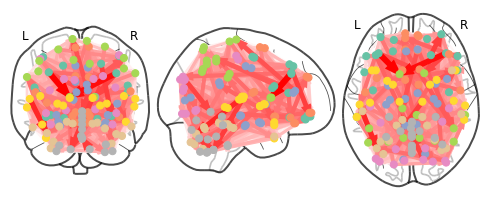

In [102]:
plotting.plot_connectome(causalities[0], node_coords=coord_arr)

C:\ProgramData\Anaconda3\envs\SLHaka\lib\site-packages\nilearn\plotting\displays.py:2204: UserWarning: 'adjacency_matrix' is not symmetric. A directed graph will be plotted.
  warnings.warn(("'adjacency_matrix' is not symmetric. "


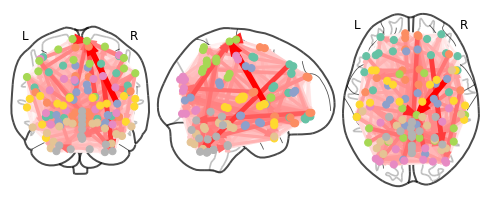

In [94]:
plotting.plot_connectome(causalities[1], node_coords=coord_arr)

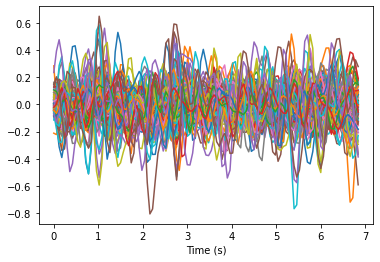

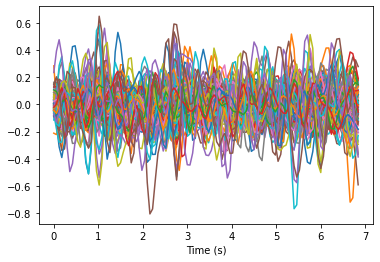

In [96]:
viz.plot_tseries(time_series[0])

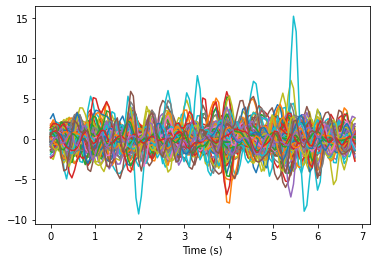

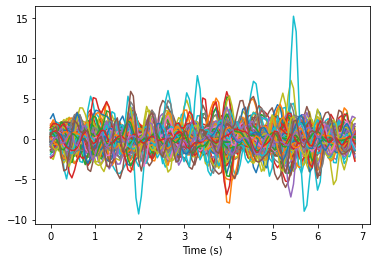

In [95]:
viz.plot_tseries(time_series[1])
